###CLUSTERING: DBSCAN

Otro algorítmo de clustering que resuelve algunas de las limitaciones que presenta K-means es DBSCAN. Un algoritmo que clusteriza por densidad de puntos en el espacio. Para esto el algorítmo busca los casos centrales donde hay gran densidad y los utiliza para determinar el centro de cada cluster. DBSCAN trabaja con distintas geometrías al contrario de K-means. Los parámetros que van a definir la densidad límite para clusterizar son min_samples y eps. A mayor min_samples o menor eps vamos a estar buscando una mayor densidad para generar los cluster. Min samples refiere a la cantidad de casos centrales que va a encontrar el algorítmo y eps a la distancia del resto de los casos a aquellos centrales. El primer parámetro controla la tolerancia del algoritmo al ruido (cuanto mas ruidoso el dataset es mejor aumentar dicho parámetro). En cuanto al parámetro eps, es importante evaluar su valor ya que influye de gran manera en los resultados del algoritmo. Si el valor de eps es demasiado pequeño la data puede ser clasificada como -1 caso contrario toda los datos pueden ser agrupados en un solo cluster erroneamente.

In [6]:
!pip install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 78.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939415 sha256=d28819fc44978406f68d7bec03b28815903ce15508647a894f9d9671dd3b5600
  Stored in directory: /root/.cache/pip/wheels/29/93/3f/af54c413cecaac292940342c61882d2a8848674175d0bb0889
Successfully built pydataset


In [7]:
from pydataset import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Carga del datset
iris_original = data('iris')
# Copia para luego validar
iris = iris_original.copy()
# Se eliminan las etiquetas
del iris['Species']

# Asignación de colores
iris_original['Color']='red' # Nueva columna con el color
iris_original.loc[iris_original.Species == "setosa",'Color']='green'
iris_original.loc[iris_original.Species == "versicolor",'Color']='blue'
iris_original.head()


initiated datasets repo at: /root/.pydataset/


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color
1,5.1,3.5,1.4,0.2,setosa,green
2,4.9,3.0,1.4,0.2,setosa,green
3,4.7,3.2,1.3,0.2,setosa,green
4,4.6,3.1,1.5,0.2,setosa,green
5,5.0,3.6,1.4,0.2,setosa,green


In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

db = DBSCAN(eps=0.7, min_samples=10).fit(iris)

cluster_labels = db.labels_
print(set(cluster_labels))
n_clusters = len(set(cluster_labels))

{0, 1, -1}


In [ ]:
cluster_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
n_clusters

3

In [ ]:
# Añade las etiquetas al dataset original
iris_original['Cluster']= cluster_labels
iris_original.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color,Cluster
1,5.1,3.5,1.4,0.2,setosa,green,0
2,4.9,3.0,1.4,0.2,setosa,green,0
3,4.7,3.2,1.3,0.2,setosa,green,0
4,4.6,3.1,1.5,0.2,setosa,green,0
5,5.0,3.6,1.4,0.2,setosa,green,0


In [ ]:
# Asigna colores a cada clúster
iris_original['Color2']='yellow' # Nueva columna con el color
iris_original.loc[iris_original.Cluster == 1,'Color2']='brown'
iris_original.loc[iris_original.Cluster == 0,'Color2']='cyan'
iris_original.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Color,Cluster,Color2
1,5.1,3.5,1.4,0.2,setosa,green,0,cyan
2,4.9,3.0,1.4,0.2,setosa,green,0,cyan
3,4.7,3.2,1.3,0.2,setosa,green,0,cyan
4,4.6,3.1,1.5,0.2,setosa,green,0,cyan
5,5.0,3.6,1.4,0.2,setosa,green,0,cyan


In [ ]:
ct = pd.crosstab(
    iris_original['Species'],
    iris_original['Cluster'])
print(ct)

Cluster     -1   0   1
Species               
setosa       0  50   0
versicolor   2   0  48
virginica    6   0  44


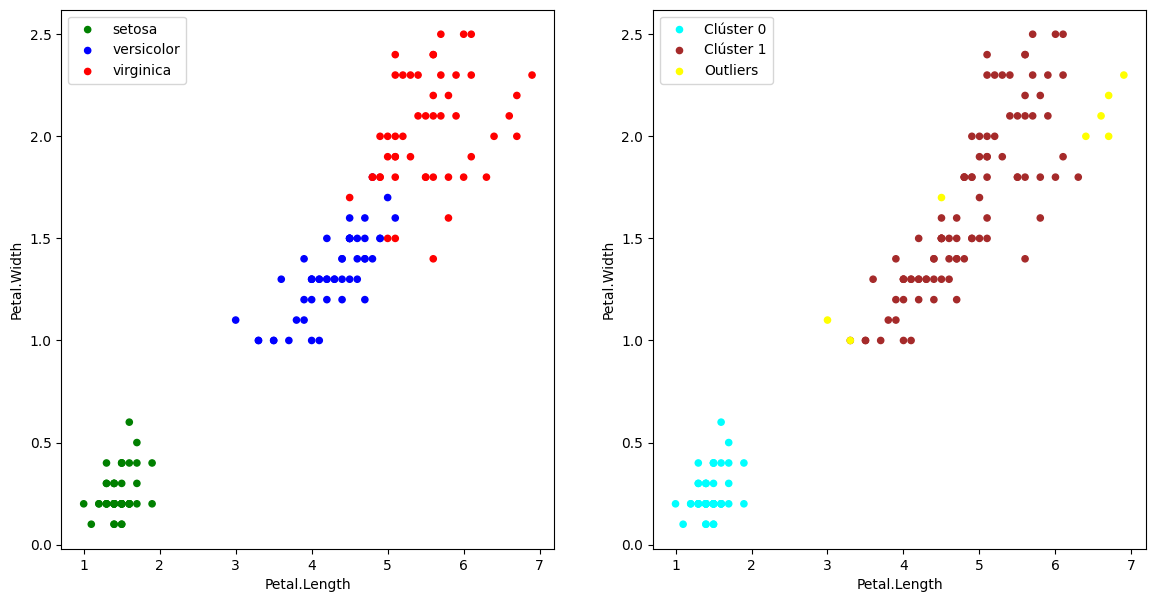

In [ ]:
from pylab import rcParams

rcParams['figure.figsize'] = 14, 7
# Subplots para comparar la clusterización con los datos etiquetados: Información de pètalos
fig, axes = plt.subplots(nrows=1, ncols=2)

# Primer subplot
# Selecciona las observaciones de cada especie y las presenta en scatter plots
specie = iris_original.loc[iris_original.Species == 'setosa',:]
specie.plot(ax=axes[0,],x='Petal.Length', y='Petal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'versicolor',:]
specie.plot(ax=axes[0,],x='Petal.Length', y='Petal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'virginica',:]
ax1=specie.plot(ax=axes[0,],x='Petal.Length', y='Petal.Width',
          c=specie.Color,kind='scatter')
# Añade leyenda
ax1.legend(('setosa', 'versicolor', 'virginica'), loc='best')


# Segundo subplot
# Selecciona las observaciones de cada clúster y las presenta en scatter plots
cluster = iris_original.loc[iris_original.Cluster == 0,:]
cluster.plot(ax=axes[1,],x='Petal.Length', y='Petal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == 1,:]
cluster.plot(ax=axes[1,],x='Petal.Length', y='Petal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == -1,:]
ax2=cluster.plot(ax=axes[1,],x='Petal.Length', y='Petal.Width',
          c=cluster.Color2,kind='scatter')
# Añade leyenda
ax2.legend(('Clúster 0','Clúster 1','Outliers'), loc='best')

plt.show()

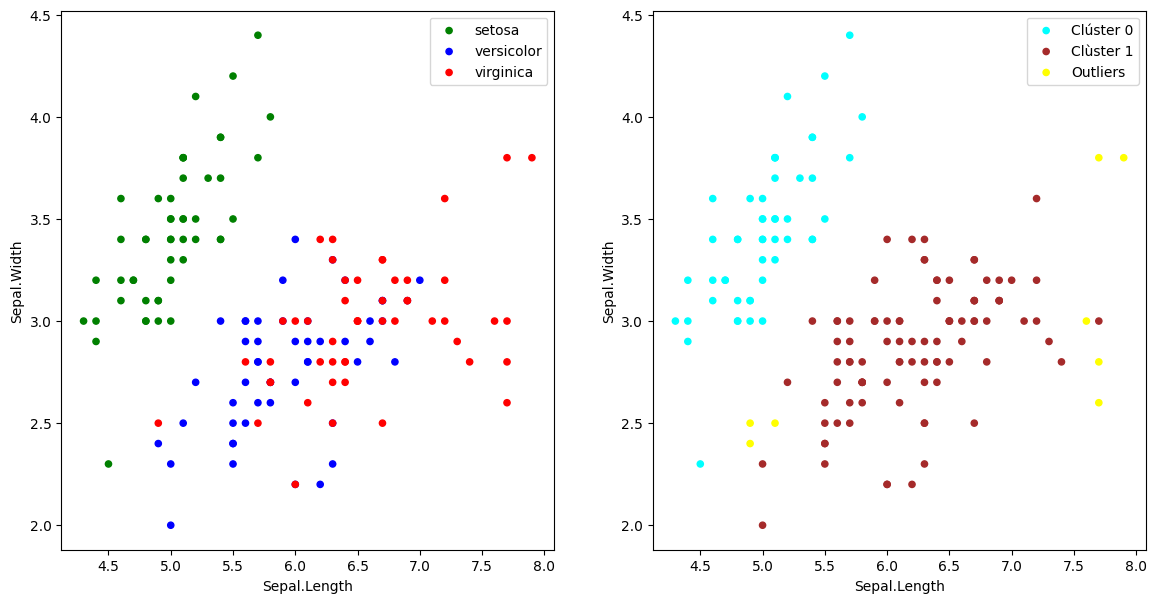

In [ ]:
from pylab import rcParams

rcParams['figure.figsize'] = 14, 7
# Subplots para comparar la clusterización con los datos etiquetados: Información de sèpalos
fig, axes = plt.subplots(nrows=1, ncols=2)

# Primer subplot
# Selecciona las observaciones de cada especie y las presenta en scatter plots
specie = iris_original.loc[iris_original.Species == 'setosa',:]
specie.plot(ax=axes[0,],x='Sepal.Length', y='Sepal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'versicolor',:]
specie.plot(ax=axes[0,],x='Sepal.Length', y='Sepal.Width',
          c=specie.Color,kind='scatter')
specie = iris_original.loc[iris_original.Species == 'virginica',:]
ax1=specie.plot(ax=axes[0,],x='Sepal.Length', y='Sepal.Width',
          c=specie.Color,kind='scatter')

# Añade leyenda
ax1.legend(('setosa', 'versicolor', 'virginica'), loc='best')



# Segundo subplot
# Selecciona las observaciones de cada clúster y las presenta en scatter plots
cluster = iris_original.loc[iris_original.Cluster == 0,:]
cluster.plot(ax=axes[1,],x='Sepal.Length', y='Sepal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == 1,:]
cluster.plot(ax=axes[1,],x='Sepal.Length', y='Sepal.Width',
          c=cluster.Color2,kind='scatter')
cluster = iris_original.loc[iris_original.Cluster == -1,:]
ax2=cluster.plot(ax=axes[1,],x='Sepal.Length', y='Sepal.Width',
          c=cluster.Color2,kind='scatter')

# Añade leyenda
ax2.legend(('Clúster 0','Clùster 1','Outliers'), loc='best')


plt.show()

In [ ]:
ct = pd.crosstab(
    iris_original['Species'],
    iris_original['Cluster'])
print(ct)

Cluster     -1   0   1
Species               
setosa       0  50   0
versicolor   2   0  48
virginica    6   0  44


#**OTRO EJEMPLO: Datos Sinteticos**

In [8]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

generamos datos


In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

Utilizamos DBSCAN para encontrar los clusters

In [3]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
#db = DBSCAN(eps=0.4, min_samples=9).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('vemos algunas métricas para determinar la performance de nuestro modelo')
print("Estimado número de cluster: %d" % n_clusters_)
print("Estimado número de puntos ruidosos: %d" % n_noise_)
print("homoheneidad: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("completitud: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Ajuste Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Ajuste Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Coeficiente Silhouette: %0.3f" % metrics.silhouette_score(X, labels))

vemos algunas métricas para determinar la performance de nuestro modelo
Estimado número de cluster: 3
Estimado número de puntos ruidosos: 18
homoheneidad: 0.953
completitud: 0.883
V-measure: 0.917
Ajuste Rand Index: 0.952
Ajuste Mutual Information: 0.916
Coeficiente Silhouette: 0.626


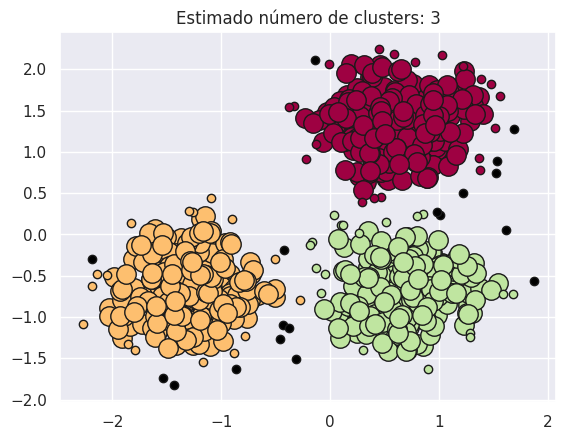

In [9]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimado número de clusters: %d" % n_clusters_)
plt.show()

Aumento la distancia y reduzco Min Samples

In [10]:
#db = DBSCAN(eps=0.3, min_samples=10).fit(X)
db = DBSCAN(eps=0.4, min_samples=9).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('vemos algunas métricas para determinar la performance de nuestro modelo')
print("Estimado número de cluster: %d" % n_clusters_)
print("Estimado número de puntos ruidosos: %d" % n_noise_)
print("homoheneidad: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("completitud: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Ajuste Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Ajuste Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Coeficiente Silhouette: %0.3f" % metrics.silhouette_score(X, labels))

vemos algunas métricas para determinar la performance de nuestro modelo
Estimado número de cluster: 1
Estimado número de puntos ruidosos: 2
homoheneidad: 0.001
completitud: 0.059
V-measure: 0.002
Ajuste Rand Index: -0.000
Ajuste Mutual Information: -0.001
Coeficiente Silhouette: 0.061


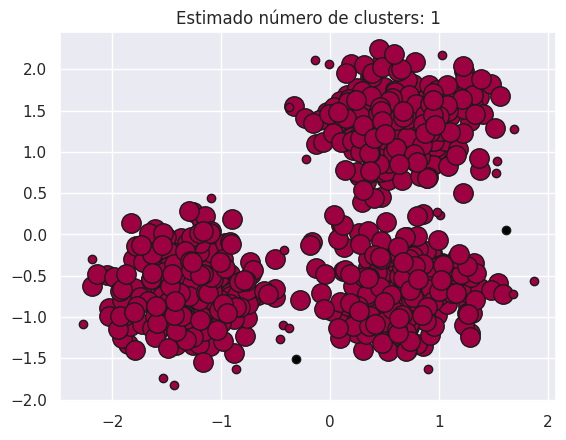

In [11]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimado número de clusters: %d" % n_clusters_)
plt.show()

Aca estariamos encontrando un solo Cluster

- Como vemos este modelo de clusterización encuentra por si solo la mejor cantidad de clusters. Sin embargo esto se puede ir modificando a través de los parámetros que vimos. Pero no es necesario defenir el número de clusters como pasaba en K-means.
- DBSCAN es un modelo determinístico lo que indica que siempre va a llegar al mismo resultado al contrario de kmeans donde la aleatoreidad de la inicialización puedo llevarnos a diferentes tipos de resultados
- Una mejora de este algoritmo es HDBSCAN

### Limitaciones: DBSCAN

La principal limitación que presenta este método es la eficiencia en términos de memoria. Para grandes cantidades de datos con mucha dimensionalidad no performa bien ya que debe hacer una matríz de covarianza entre variables y en casos donde las dimensiones son muy grandes la operación consumen demasiada memoria.
Otro algoritmo que permite sortear este problema es OPTICS también presente en la librería Scikit-learn o HDBSCAN.


### Evaluando calidad de clusterización.

Evaluar la calidad de la clusterización no es tan sencillo como cuando teniamos un target. En este caso entender si estamos haciendo las cosas bien sin tener una 'respuesta' a la cual queremos llegar va a depender de ciertas métricas que nos indique que tan bien está ajustando el algorítmo a los datos.
Podemos hablar por ejemplo de que tan bien se separan los clusters, o si los elementos de un cluster se parecen más entre si que al resto utilizando alguna métrica de similaridad.
Mencionamos algunas métricas:

- **Inertia**:
En el caso del método K-means la métrica utilizada para evaluar es **inertia**, que es la métrica que el mismo modelo trata de optimizar. A menor valor mejores métricas.
- **Rand index**:
Si bien estos métodos son de aprendizaje no supervisado podemos tener el caso donde sabemos los grupos pertenecientes. En este caso podemos utilizar rand index que nos va a dar un score. Similar cuando trabajamos con clasificación
- **Coeficiente Silhouette**:
este coeficiente describe que tan bien agrupan los clusters. A mayor coeficiente vamos a encontrar grupos mejor definidos. Esta métrica trabaja con la distancia entre un punto y el resto de los puntos de su propio grupo y la distancia entre un punto y los puntos de grupo más cercano que no es el de sí mismo. Este valor esta normalizado entre -1 y 1. Este coeficiente funciona mejor con formas convexas.
- **Calinski-Harabasz Index**: A mayor valor mejores grupos esta encontrando nuestro método de clusterización. Esta métrica trabaja con la disperción de los clusters.


